<a href="https://www.kaggle.com/code/dheerajanumula/eda-project-9-spotify-track-analysis?scriptVersionId=255383897" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Spotify by the Numbers: Trends in Tracks, Artists & Genres

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/-spotify-tracks-dataset/dataset.csv


-> To begin the analysis, we import the essential Python libraries:

**Pandas** for data manipulation and analysis.

**Numpy** for numerical operations.

**matplotlib.pyplot** for visualizing the data.

In [2]:
import matplotlib.pyplot as plt


Loading the Spotify Tracks DataSet using **read_csv** function 

In [3]:
df=pd.read_csv('/kaggle/input/-spotify-tracks-dataset/dataset.csv')
df=pd.DataFrame(df)
df


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Dataset has 114000 rows and 21 columns, it has wide range of data about spotify tracks, albums artists and different measures of songs such as energy, loudness, spechiness, acousticness

## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Filling 3 null values 

In [6]:
df['artists']=df['artists'].fillna('Unknown Artist')
df['album_name']=df['album_name'].fillna('Unknown Album')
df['track_name']=df['track_name'].fillna('Unknown Track')
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Now There are no null values

Duration is in milli seconds, converting it to minutes for easeness of calculations

In [7]:
df['duration_min'] = df['duration_ms'] / 60000  # 1000 ms * 60 sec = 60000
df['duration_min'] = df['duration_min'].round(2)



In [8]:
df = df.drop('duration_ms', axis=1)


## EDA

In [9]:
df.describe()


,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
count,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035,3.800467
std,32909.109681,22.305078,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621,1.788301
min,0.000000,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000,2.900000
50%,56999.500000,35.000000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,3.550000
75%,85499.250000,50.000000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000,4.360000
max,113999.000000,100.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,87.290000


The dataset includes 114,000 music tracks, covering features like danceability, energy, acousticness, and more.  
The average track has a popularity score of 33.2 and a danceability value of 0.57, indicating moderately catchy music.  
Most tracks are in major mode (mean mode ≈ 0.64) and have an average tempo of 122 BPM.  
Track durations typically range between 2.9 and 4.4 minutes, with a maximum length of over 87 minutes.


**Distribution of Popularity, Danceability, Energy, Duration_min (Histogram)**

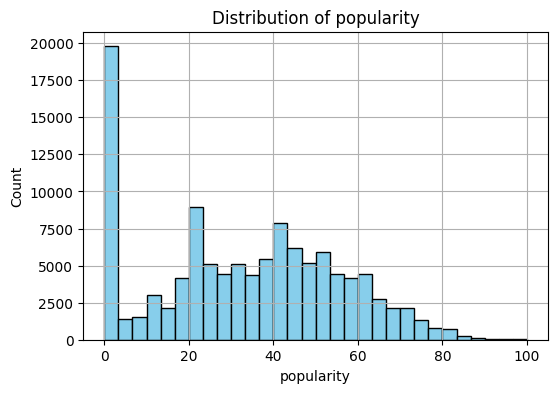

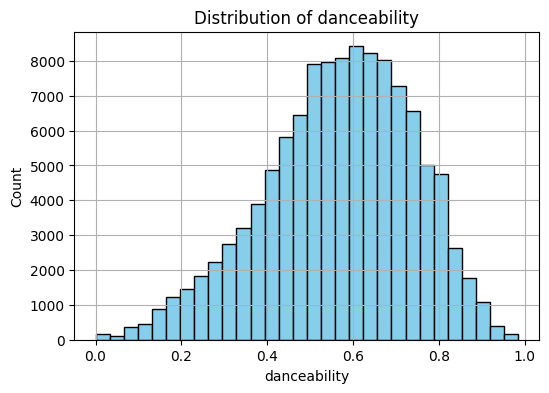

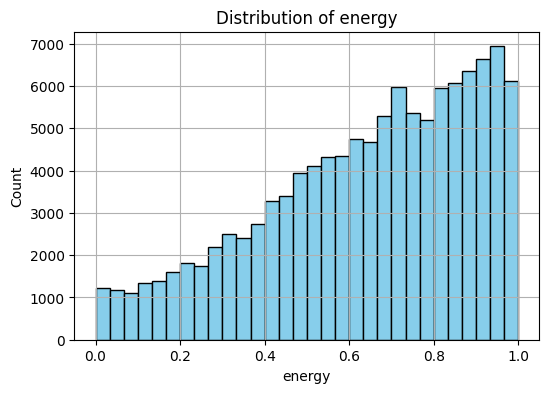

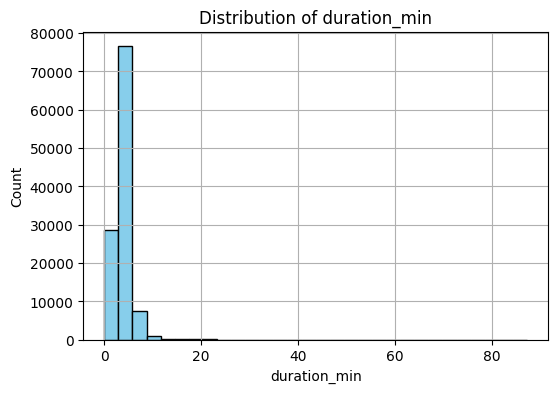

In [10]:
numeric_cols = ['popularity', 'danceability', 'energy', 'duration_min']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()


**Notes**: The popularity distribution is right-skewed, with a large number of tracks having very low popularity scores.  

Many tracks have a popularity close to zero, while only a small fraction exceeds a score of 70.  

Danceability shows a more normal distribution, peaking around 0.6, indicating most tracks are moderately danceable.  

Very few tracks have extremely low or extremely high danceability values.

The energy distribution is left-skewed, with a growing number of tracks having higher energy values.

Most songs fall in the range above 0.6, indicating a strong presence of energetic tracks in the dataset.

The duration_min distribution is highly right-skewed, with the majority of tracks lasting between 2 to 5 minutes.

A few tracks have very long durations, likely representing podcasts, mixes, or outliers.

**Top 10 Genres**

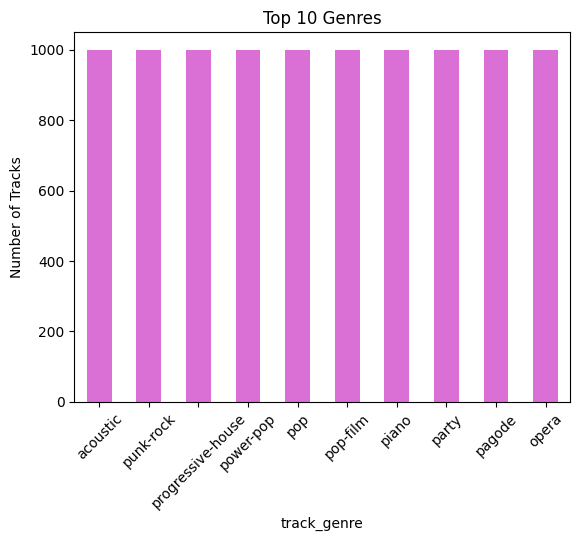

In [11]:
df['track_genre'].value_counts().head(10).plot(kind='bar', color='orchid')
plt.title('Top 10 Genres')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()



The dataset includes a balanced distribution across the top 10 genres, with each genre having nearly 1,000 tracks.
Genres like acoustic, rock, pop, and opera are among the most represented.

**who are the top 10 artists by track count**

In [12]:
top_artist = df['artists'].value_counts().head(10)

print("Top 10 artists by track count:\n")
print(top_artist)


Top 10 artists by track count:

artists
The Beatles        279
George Jones       271
Stevie Wonder      236
Linkin Park        224
Ella Fitzgerald    222
Prateek Kuhad      217
Feid               202
Chuck Berry        190
Håkan Hellström    183
OneRepublic        181
Name: count, dtype: int64


**Who are the top 10 artists by number of Tracks**

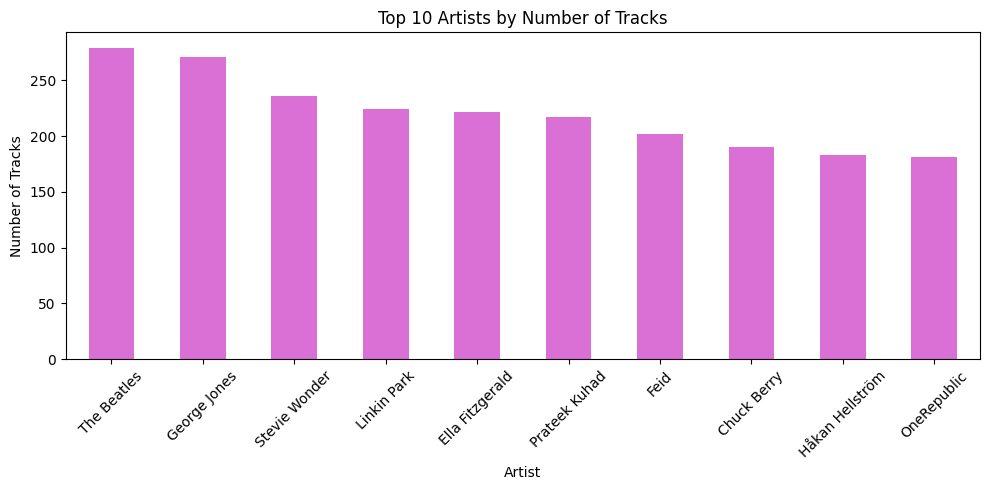

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
top_artist.plot(kind='bar', color='orchid')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The Beatles and George Jones lead the dataset with the highest number of tracks, followed by a mix of legendary and contemporary artists.


In [14]:
album_count = df['album_name'].value_counts()

# Print the count for 'Alternative Christmas 2022'
print("Tracks in 'Alternative Christmas 2022':", album_count.get('Alternative Christmas 2022', 0))


Tracks in 'Alternative Christmas 2022': 195


In [15]:
df[df['album_name'] == 'Alternative Christmas 2022']


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
91,91,5OGpsZeJRZ3t3MZioawcZW,The Civil Wars,Alternative Christmas 2022,I Heard The Bells On Christmas Day,0,False,0.492,0.145,2,...,0,0.0422,0.87200,0.000010,0.1070,0.218,90.078,4,acoustic,2.57
92,92,3Vnes7v746dYzBn0FJTZ1W,KT Tunstall,Alternative Christmas 2022,Fairytale Of New York,0,False,0.447,0.555,2,...,1,0.0349,0.21800,0.000003,0.1240,0.330,117.888,3,acoustic,4.40
2041,2041,3omnDqXnlC4awZfUrGQSDN,The Killers;Toni Halliday,Alternative Christmas 2022,A Great Big Sled,0,False,0.532,0.872,0,...,1,0.0636,0.00223,0.000000,0.2830,0.299,127.959,4,alt-rock,4.38
2043,2043,7GEQkaJPZmph6xtzXFNWxn,The Killers,Alternative Christmas 2022,Joy Ride - Night Version,0,False,0.666,0.935,0,...,1,0.0445,0.00285,0.781000,0.3520,0.690,118.999,4,alt-rock,7.27
2044,2044,2S3G868WlDZNtfwZiDKPRx,The Killers;Ryan Pardey,Alternative Christmas 2022,Don't Shoot Me Santa,0,False,0.588,0.847,8,...,1,0.0705,0.06010,0.000000,0.3070,0.662,120.041,4,alt-rock,4.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102591,102591,3Vnes7v746dYzBn0FJTZ1W,KT Tunstall,Alternative Christmas 2022,Fairytale Of New York,0,False,0.447,0.555,2,...,1,0.0349,0.21800,0.000003,0.1240,0.330,117.888,3,songwriter,4.40
102745,102745,6PrnqAkxifshpNad1rFk5t,Rufus Wainwright,Alternative Christmas 2022,Gay Messiah,0,True,0.373,0.438,0,...,1,0.0297,0.56300,0.000109,0.3550,0.411,139.331,3,songwriter,3.25
102746,102746,2xZEp5wiB3fdZYGE9wCDOh,Rufus Wainwright;Sharon Van Etten,Alternative Christmas 2022,"Baby, It’s Cold Outside",0,False,0.249,0.250,0,...,0,0.0291,0.90200,0.000000,0.1070,0.298,73.520,4,songwriter,4.23
109149,109149,53uxAeBIAeTNYvhlHH3zir,Yello,Alternative Christmas 2022,Jingle Bells - Single Version,0,False,0.666,0.640,7,...,1,0.0427,0.05800,0.000986,0.1280,0.422,129.998,4,techno,2.96


**What are the top 10 albums by no of tracks**

In [16]:
top_albums = df['album_name'].value_counts().head(10)

print("Top 10 albums by number of tracks:\n")
print(top_albums)


Top 10 albums by number of tracks:

album_name
Alternative Christmas 2022     195
Feliz Cumpleaños con Perreo    184
Metal                          143
Halloween con perreito         123
Halloween Party 2022           115
The Complete Hank Williams     111
Fiesta portatil                110
Frescura y Perreo              106
Esto me suena a Farra          105
Perreo en Halloween            103
Name: count, dtype: int64


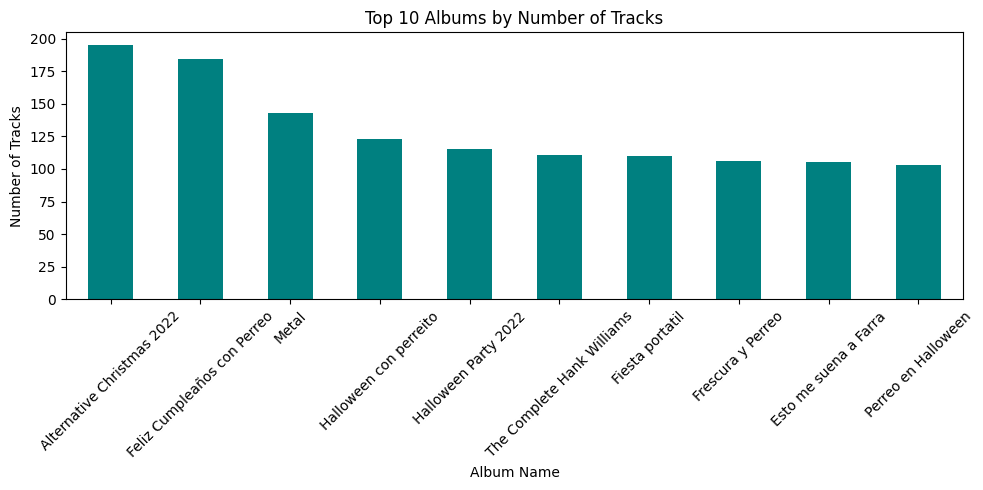

In [17]:
plt.figure(figsize=(10, 5))
top_albums.plot(kind='bar', color='teal')
plt.title('Top 10 Albums by Number of Tracks')
plt.xlabel('Album Name')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Which track is most popular****

In [18]:

most_popular_row = df[df['popularity'] == df['popularity'].max()]

most_popular_row[['artists', 'album_name', 'track_name', 'popularity']]


,artists,album_name,track_name,popularity
20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100
81051,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100


**Who is the most popular artist and least popular artist on spotify**

In [19]:
# Group by artists and calculate average popularity
artist_popularity = df.groupby('artists')['popularity'].mean().sort_values(ascending=False)

# Highest average popularity
top_artist = artist_popularity.head(1)

# Lowest average popularity
least_popular_artist = artist_popularity.tail(1)

print("Most Popular Artist:\n", top_artist)
print("\n Least Popular Artist:\n", least_popular_artist)


Most Popular Artist:
 artists
Sam Smith;Kim Petras    100.0
Name: popularity, dtype: float64

 Least Popular Artist:
 artists
Christina Perri;Addal    0.0
Name: popularity, dtype: float64


**What is the Most Popular Album and Least Popular Album**

In [20]:
# Group by album and calculate average popularity
album_popularity = df.groupby('album_name')['popularity'].mean().sort_values(ascending=False)

# Highest average popularity
top_album = album_popularity.head(1)

# Lowest average popularity
least_popular_album = album_popularity.tail(1)

print(" Most Popular Album:\n", top_album)
print("\nLeast Popular Album:\n", least_popular_album)


 Most Popular Album:
 album_name
Unholy (feat. Kim Petras)    100.0
Name: popularity, dtype: float64

Least Popular Album:
 album_name
Prey For The Gods The Ultimate Fantasy Playlist    0.0
Name: popularity, dtype: float64


**What is the most popular Track and least popular Track**

In [21]:
# Most popular track(s)
most_popular_track = df[df['popularity'] == df['popularity'].max()][['track_name', 'artists', 'popularity']]

# Least popular track(s)
least_popular_track = df[df['popularity'] == df['popularity'].min()][['track_name', 'artists', 'popularity']]

print(" Most Popular Track:\n", most_popular_track)
print("\n Least Popular Track:\n", least_popular_track)


 Most Popular Track:
                       track_name               artists  popularity
20001  Unholy (feat. Kim Petras)  Sam Smith;Kim Petras         100
81051  Unholy (feat. Kim Petras)  Sam Smith;Kim Petras         100

 Least Popular Track:
                                                track_name  \
23                                       93 Million Miles   
24                                               Unlonely   
26                                      Winter Wonderland   
27                                         If It Kills Me   
28                                      Winter Wonderland   
...                                                   ...   
113046  Ding Dong Merrily On High (The Celebration's S...   
113047                     Rudolph The Red-Nosed Reindeer   
113048                         I'll Be Home For Christmas   
113049           God Rest Ye Merry Gentlemen (Hallelujah)   
113099        It's Beginning To Look A Lot Like Christmas   

                    

**which Tracks has top 5 durations**

In [22]:
top5_durations = df.groupby('track_genre')['duration_min'].mean().sort_values(ascending=False).head(5)

print(top5_durations)


track_genre
detroit-techno    6.20016
minimal-techno    6.14765
chicago-house     6.11426
breakbeat         5.36254
iranian           5.32851
Name: duration_min, dtype: float64


 **Which Album has most duration**

In [23]:
top5_albums_duration = df.groupby('album_name')['duration_min'].sum().sort_values(ascending=False).head(5)

print(top5_albums_duration)


album_name
Alternative Christmas 2022     666.79
Feliz Cumpleaños con Perreo    654.04
Metal                          644.13
Halloween Party 2022           455.18
Halloween con perreito         432.18
Name: duration_min, dtype: float64


**what are the 10 most popular tracks genres**

In [24]:
df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(10)


track_genre
pop-film     59.283
k-pop        56.896
chill        53.651
sad          52.379
grunge       49.594
indian       49.539
anime        48.772
emo          48.128
sertanejo    47.866
pop          47.576
Name: popularity, dtype: float64

**Line Chart: Danceability vs Energy (50 Random Tracks)**

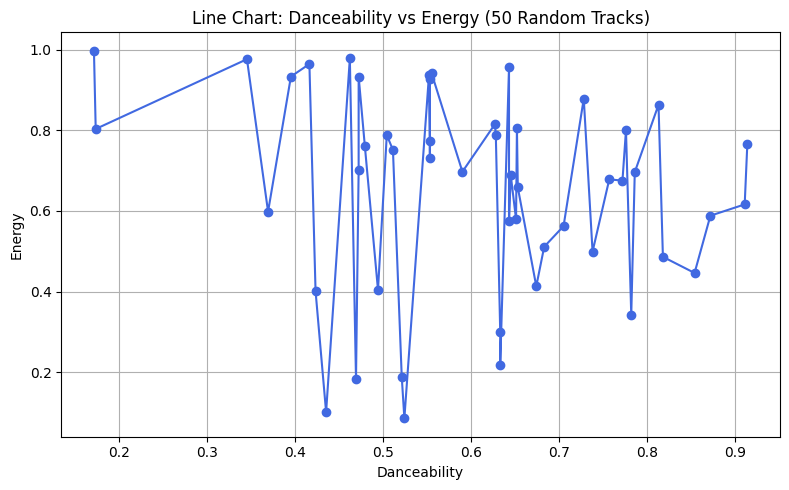

In [25]:
# Sample 50 random rows
sample = df.sample(50, random_state=42)

# Sort by danceability to make the line meaningful
sample = sample.sort_values('danceability')

# Line chart
plt.figure(figsize=(8, 5))
plt.plot(sample['danceability'], sample['energy'], marker='o', linestyle='-', color='royalblue')

plt.title('Line Chart: Danceability vs Energy (50 Random Tracks)')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
plt.tight_layout()
plt.show()




A track's high danceability score does not guarantee a high energy level (and vice-versa), suggesting a weak or complex correlation between these two audio features.

**Tracks with most Duration**

In [26]:
df.groupby('track_genre')['duration_min'].mean().sort_values(ascending=False).head(10)


track_genre
detroit-techno    6.20016
minimal-techno    6.14765
chicago-house     6.11426
breakbeat         5.36254
iranian           5.32851
gospel            5.22042
techno            5.20529
black-metal       5.18475
new-age           4.98433
world-music       4.95327
Name: duration_min, dtype: float64

**Tracks with top 10 Danceability**

In [27]:
df.groupby('track_genre')['danceability'].mean().sort_values(ascending=False).head(10)


track_genre
kids              0.778906
chicago-house     0.766176
reggaeton         0.758521
latino            0.757057
reggae            0.745331
hip-hop           0.736154
dancehall         0.734169
minimal-techno    0.729395
detroit-techno    0.722568
latin             0.721902
Name: danceability, dtype: float64

**Plot of Popularity between explicit and non explicit tracks**

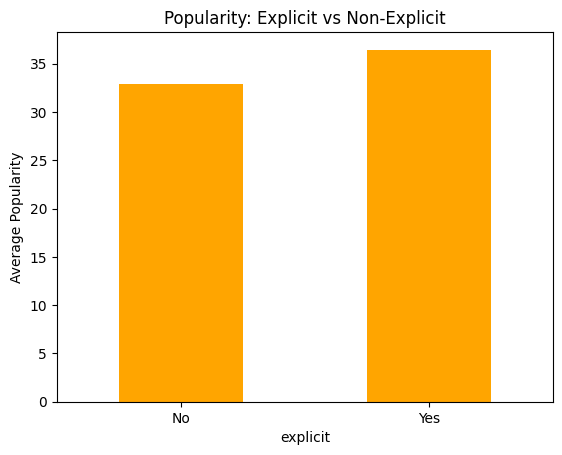

In [28]:
df.groupby('explicit')['popularity'].mean().plot(kind='bar', color='orange')
plt.title('Popularity: Explicit vs Non-Explicit')
plt.ylabel('Average Popularity')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()


This suggests that in this dataset, songs containing explicit content are, on average, marginally more popular than those without.

# Summary 
The dataset analyzed has over 114,000 songs, so it's a really big collection.

I found that most songs aren't popular at all. A lot of them have a popularity score close to zero, so getting a hit is rare.

Most of the music in the dataset is pretty high-energy, and the danceability for most tracks is just about average.

The Beatles had the most songs in the whole dataset, followed by other classic artists.

The most popular song was "Unholy" by Sam Smith and Kim Petras, which had a perfect popularity score of 100.

Interestingly, explicit songs were a little more popular on average than the non-explicit ones.

Most songs were about 2 to 5 minutes long, which is a pretty standard length.

Also, just because a song has high energy doesn't mean it has high danceability. I learned there's no simple connection between them.

The library is vast and full of energetic music from iconic artists, the formula for a hit song is not simple. Popularity is driven by more than just a track's individual audio metrics, reflecting a complex mix of artistic, cultural, and marketing factors.